In [28]:
import matplotlib.pyplot as plt
import numpy as np

## Generate sine wave

In [29]:
n = 1000 # number of samples
A = 1 # peak-to-peak amplitude is 2 Hz
offset = 2 # the vertical shift
fs = 100 # sampling frequency Hz
f = 2 # wave frequency
total_time = n / fs
T = np.linspace(0, total_time, n, endpoint=False)

signal = A * np.sin(2 * np.pi * f * T ) + offset

## Calculate the mean and standard deviation of sine wave

In [30]:
# sine wave
mean1 = np.sum(signal) / n
# compare to np.mean
mean2 = np.mean(signal)

print(f'Manual mean = {mean1:.5f},\nNumpy mean function = {mean2:.5f}')

Manual mean = 2.00000,
Numpy mean function = 2.00000


In [31]:
sin_sd1 = np.sqrt(np.sum((signal - mean1)**2 / n))
sin_sd2 = np.std(signal)
print(f'Manual SD = {sin_sd1:.5f},\nNumpy SD function = {sin_sd2:.5f}')

Manual SD = 0.70711,
Numpy SD function = 0.70711


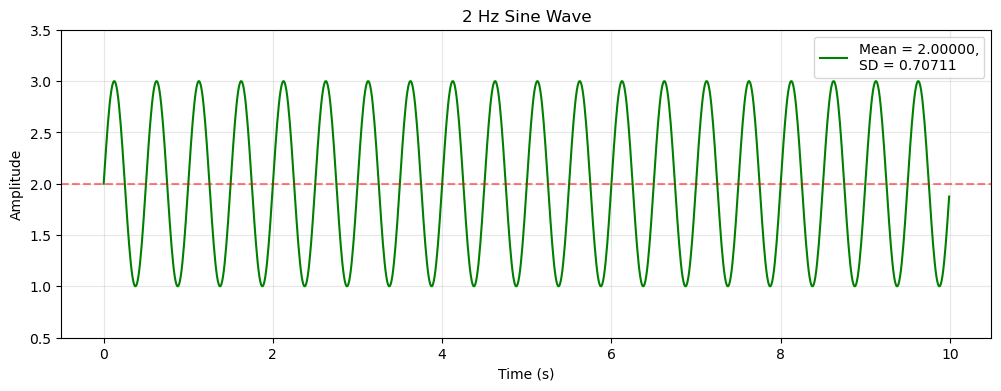

In [32]:
# Plot sine wave
plt.figure(figsize=(12, 4))
plt.plot(T, signal, color='green',
         label=f'Mean = {mean1:.5f},\nSD = {sin_sd2:.5f}'
         )
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('2 Hz Sine Wave')
plt.grid(True, alpha=0.3)
plt.ylim([0.5, 3.5])
plt.axhline(y=offset, color='r', linestyle='--', alpha=0.5)
plt.legend()
# Save figures
# plt.savefig(r'C:\Users\robbyjost\Documents\DSP\figures\hw1')
plt.show()


## 3. Generate Square wave

In [33]:
square_wave = np.sign(np.sin(2 * np.pi * f * T))
y = A * square_wave + offset

In [34]:
# square wave
square_mean1 = np.sum(y) / n
# compare to np.mean
square_mean2 = np.mean(y)
print(f'Manual mean of square wave = {square_mean1:.5f},\nSquare wave mean with Numpy function = {square_mean2:.5f}')

Manual mean of square wave = 1.99500,
Square wave mean with Numpy function = 1.99500


In [35]:
square_sd1 = np.sqrt(np.sum((y - square_mean1)**2 / n))
square_sd2 = np.std(y)
print(f'Manual SD of square wave = {square_sd1:.5f},\nSD of square wave with Numpy function = {square_sd2:.5f}')

Manual SD of square wave = 0.99949,
SD of square wave with Numpy function = 0.99949


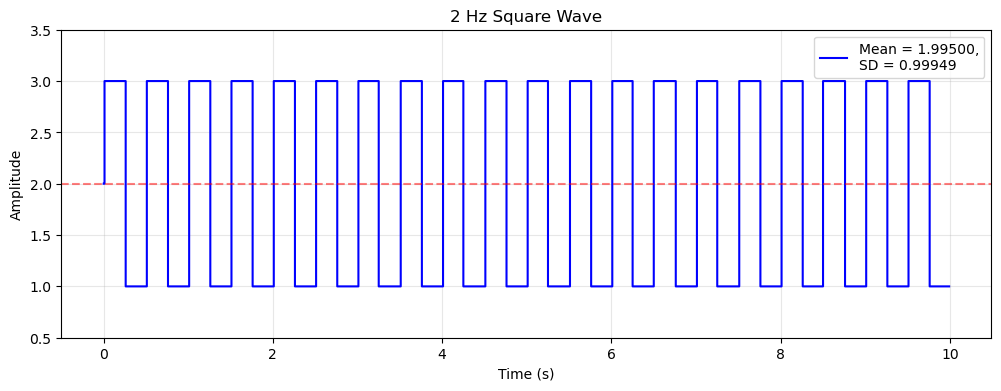

In [36]:
# Plot
plt.figure(figsize=(12, 4))
plt.plot(T, y, 'b-', linewidth=1.5, drawstyle='steps-post',
         label=f'Mean = {square_mean1:.5f},\nSD = {square_sd2:.5f}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('2 Hz Square Wave')
plt.grid(True, alpha=0.3)
plt.ylim([0.5, 3.5])
plt.axhline(y=offset, color='r', linestyle='--', alpha=0.5)
# Save figures
# plt.savefig(r'C:\Users\robbyjost\Documents\DSP\figures\hw1')
plt.legend()
plt.show()

## 4. Random uniform noise

In [37]:
random_noise = np.random.uniform(low=1,high=3,size=n)

In [38]:
# Random noise
random_mean1 = np.sum(random_noise) / n
# compare to np.mean
random_mean2 = np.mean(random_noise)
print(f'Manual mean of random noise = {random_mean1:.5f},\nMean of random noise with Numpy function = {random_mean2:.5f}')

Manual mean of random noise = 1.97812,
Mean of random noise with Numpy function = 1.97812


In [39]:
random_sd1 = np.sqrt(np.sum((random_noise - random_mean1)**2 / n))
random_sd2 = np.std(random_noise)
print(f'Manual SD of random noise = {random_sd1:.5f},\nSD of random noise with Numpy function = {random_sd2:.5f}')

Manual SD of random noise = 0.58328,
SD of random noise with Numpy function = 0.58328


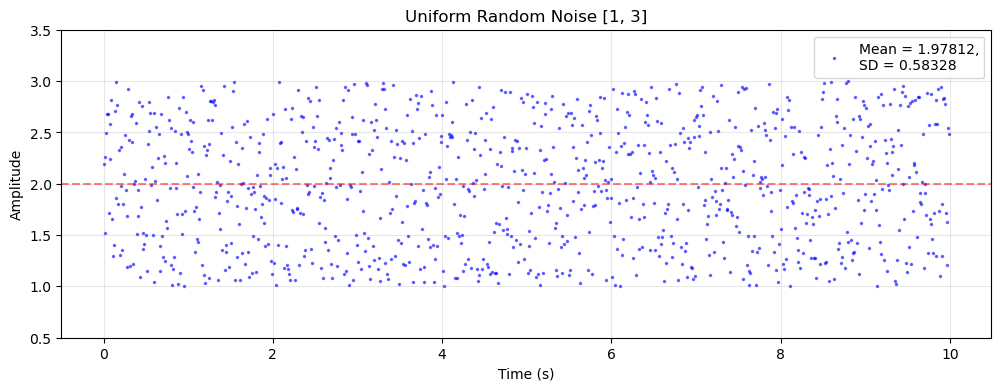

In [40]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 1, 1)

plt.plot(T, random_noise, 'b.', markersize=3, alpha=0.5,
         label=f'Mean = {random_mean1:.5f},\nSD = {random_sd2:.5f}'
         )
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Uniform Random Noise [1, 3]')
plt.grid(True, alpha=0.3)
plt.ylim([0.5, 3.5])
plt.axhline(y=offset, color='r', linestyle='--', alpha=0.5)
plt.legend()
# Save figures
# plt.savefig(r'C:\Users\robbyjost\Documents\DSP\figures\hw1')
plt.show()

## 5. Plot histograms

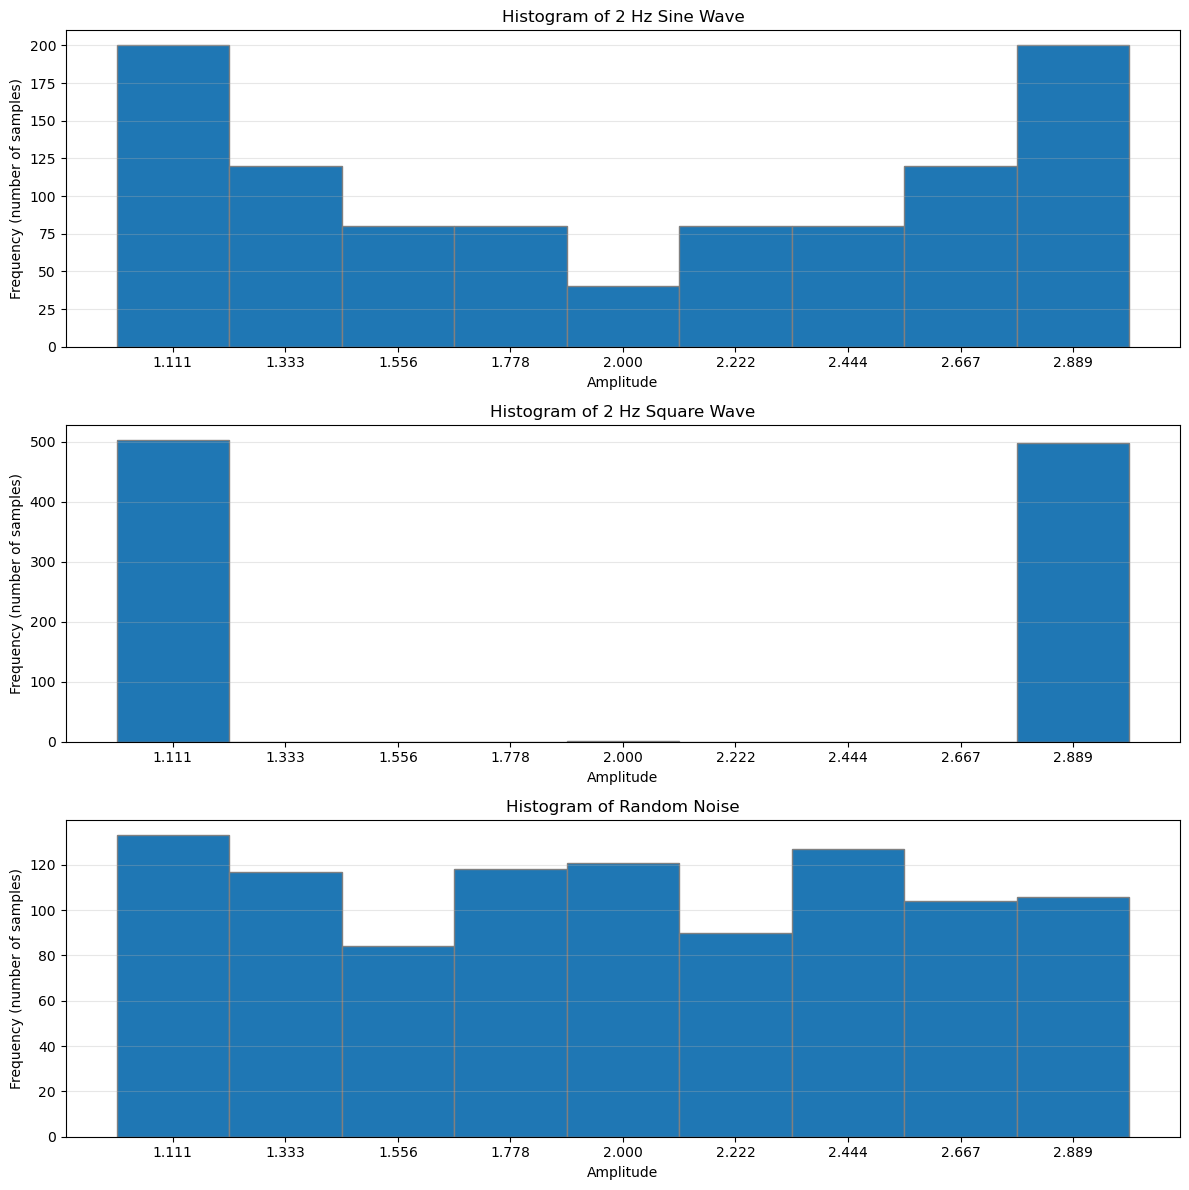

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))
abscissa = np.linspace(1, 3, 10)

# sine wave
sin_counts, sin_bins = np.histogram(signal, bins=abscissa)
sin_bin_centers = (sin_bins[:-1] + sin_bins[1:]) / 2
sin_bin_widths = np.diff(sin_bins)
ax1.bar(x=sin_bin_centers, height=sin_counts, 
        width=sin_bin_widths, align='center', 
        edgecolor= 'gray'
        )
ax1.set_xticks(sin_bin_centers)
ax1.set_xlabel('Amplitude')
ax1.set_ylabel('Frequency (number of samples)')
ax1.set_title('Histogram of 2 Hz Sine Wave')
ax1.grid(True, alpha=0.3, axis='y')

# square wave
square_counts, square_bins = np.histogram(y, bins=abscissa)
square_bin_centers = (square_bins[:-1] + square_bins[1:]) / 2
square_bin_widths = np.diff(square_bins)
ax2.bar(x=square_bin_centers, height=square_counts,
        width=square_bin_widths, align='center',
        edgecolor= 'gray'
        )
ax2.set_xticks(square_bin_centers)
ax2.set_xlabel('Amplitude')
ax2.set_ylabel('Frequency (number of samples)')
ax2.set_title('Histogram of 2 Hz Square Wave')
ax2.grid(True, alpha=0.3, axis='y')

# random noise
random_counts, random_bins = np.histogram(random_noise, bins=abscissa)
random_bin_centers = (random_bins[:-1] + random_bins[1:]) / 2
random_bin_widths = np.diff(random_bins)
ax3.bar(x=random_bin_centers, height=random_counts,
        width=random_bin_widths, align='center',
        edgecolor= 'gray'
        )
ax3.set_xticks(random_bin_centers)
ax3.set_xlabel('Amplitude')
ax3.set_ylabel('Frequency (number of samples)')
ax3.set_title('Histogram of Random Noise')
ax3.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
# Save figures
# plt.savefig(r'C:\Users\robbyjost\Documents\DSP\figures\hw1')
plt.show()

## 6. Plot the Probability Mass Function

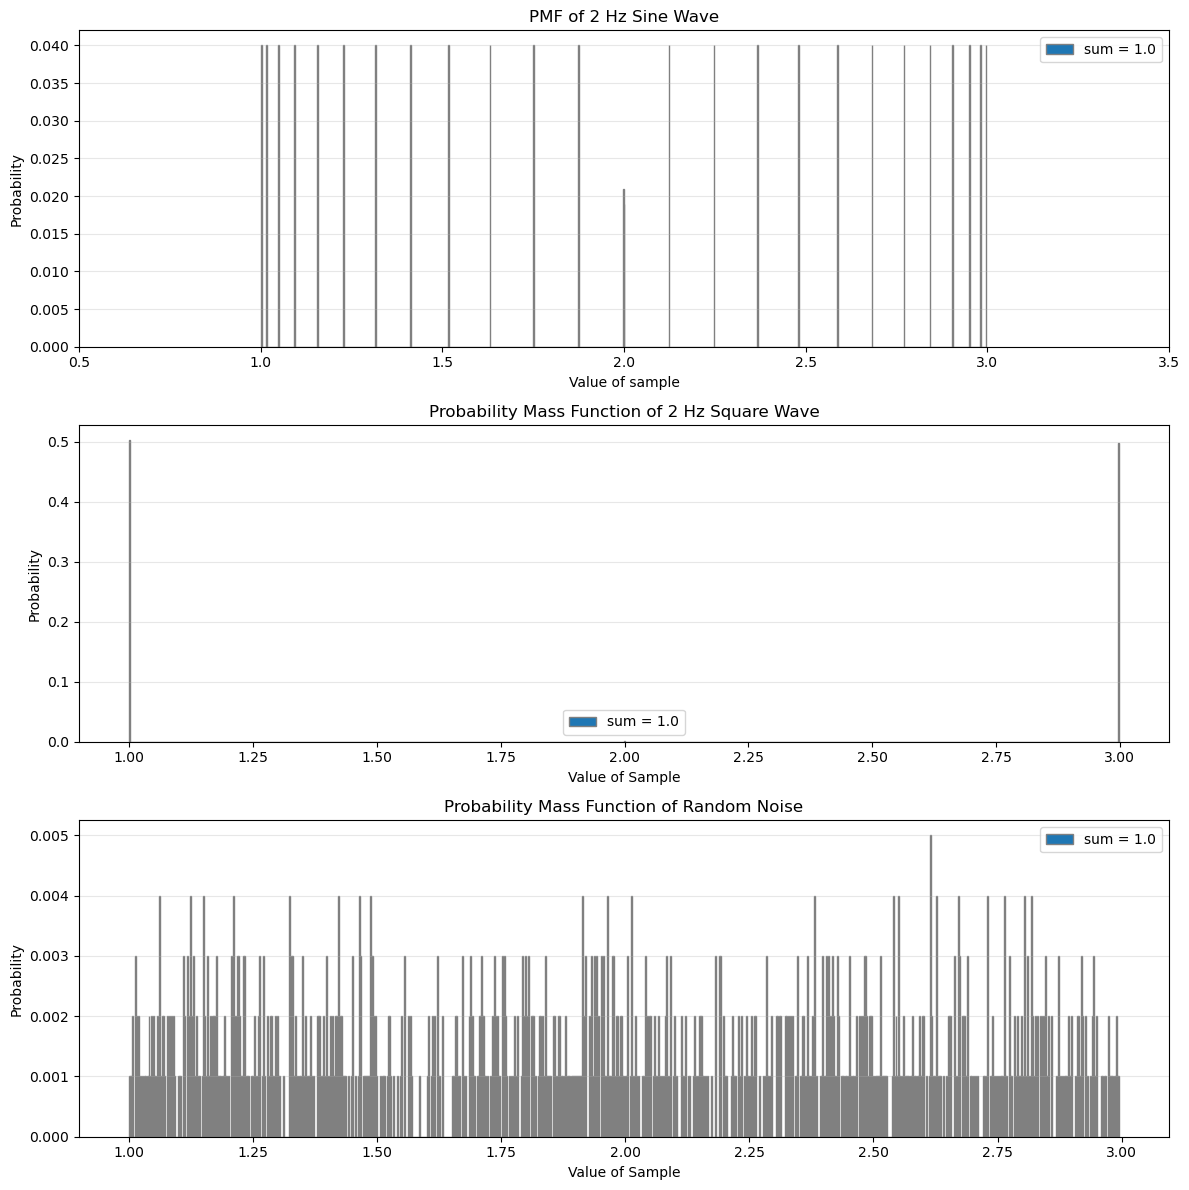

In [42]:
# Plot the PMF
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))
abscissa = np.linspace(1, 3, 10)

# sine wave
sin_counts, sin_bins = np.histogram(signal, bins=n)
sin_pmf = sin_counts / n
sin_pmf_centers = (sin_bins[:-1] + sin_bins[1:]) / 2

ax1.bar(x=sin_bins[:-1], height=sin_pmf,
        width=1.0*(sin_pmf_centers[1]-sin_pmf_centers[0]),
        edgecolor='gray', label=f'sum = {np.sum(sin_counts / n)}'
        )

ax1.set_xlabel('Value of sample')
ax1.set_ylabel('Probability')
ax1.set_xlim((0.5, 3.5))
ax1.set_title('PMF of 2 Hz Sine Wave')
ax1.grid(True, alpha=0.3, axis='y')
ax1.legend()

# square wave
square_counts, square_bins = np.histogram(y, bins=n)
square_pmf = square_counts / n
square_pmf_centers = (square_bins[:-1] + square_bins[1:]) / 2

ax2.bar(x=square_bins[:-1], height=square_pmf,
        width=1.0*(square_pmf_centers[1]-square_pmf_centers[0]),
        edgecolor='gray', label=f'sum = {np.sum(square_counts / n)}'
        )

ax2.set_xlabel('Value of Sample')
ax2.set_ylabel('Probability')
ax2.set_title('Probability Mass Function of 2 Hz Square Wave')
ax2.grid(True, alpha=0.3, axis='y')
ax2.legend()
# random noise
random_counts, random_bins = np.histogram(random_noise, bins=n)
random_pmf = random_counts / n
random_pmf_centers = (random_bins[:-1] + random_bins[1:]) / 2
#random_pmf_widths = np.diff(random_pmf_centers)
ax3.bar(x=random_bins[:-1], height=random_pmf,
        width=1.0*(random_pmf_centers[1]-random_pmf_centers[0]),
        edgecolor='gray', label=f'sum = {np.sum(square_counts / n)}'
        )
#ax3.set_xticks(random_bin_centers)
ax3.set_xlabel('Value of Sample')
ax3.set_ylabel('Probability')
ax3.set_title('Probability Mass Function of Random Noise')
ax3.grid(True, alpha=0.3, axis='y')
ax3.legend()

plt.tight_layout()
# Save figures
#plt.savefig(r'C:\Users\robbyjost\Documents\DSP\figures\hw1')
plt.show()